# Code Komunitas Facebook

In [1]:
!pip uninstall community -y
!pip uninstall python-louvain -y
!pip install python-louvain

Found existing installation: python-louvain 0.16
Uninstalling python-louvain-0.16:
  Successfully uninstalled python-louvain-0.16
  Using cached python_louvain-0.16-py3-none-any.whl


HASIL ANALISIS
Modularity      : 0.834
Total Komunitas : 16
Total Node (user): 4039
Total Edge (hubungan): 88234

ISI DATA (Preview 10 Baris Pertama)
Baris 1: 0 1
Baris 2: 0 2
Baris 3: 0 3
Baris 4: 0 4
Baris 5: 0 5
Baris 6: 0 6
Baris 7: 0 7
Baris 8: 0 8
Baris 9: 0 9
Baris 10: 0 10
... (dan seterusnya sampai ribuan baris) ...

Sedang membuat visualisasi, tunggu sebentar...


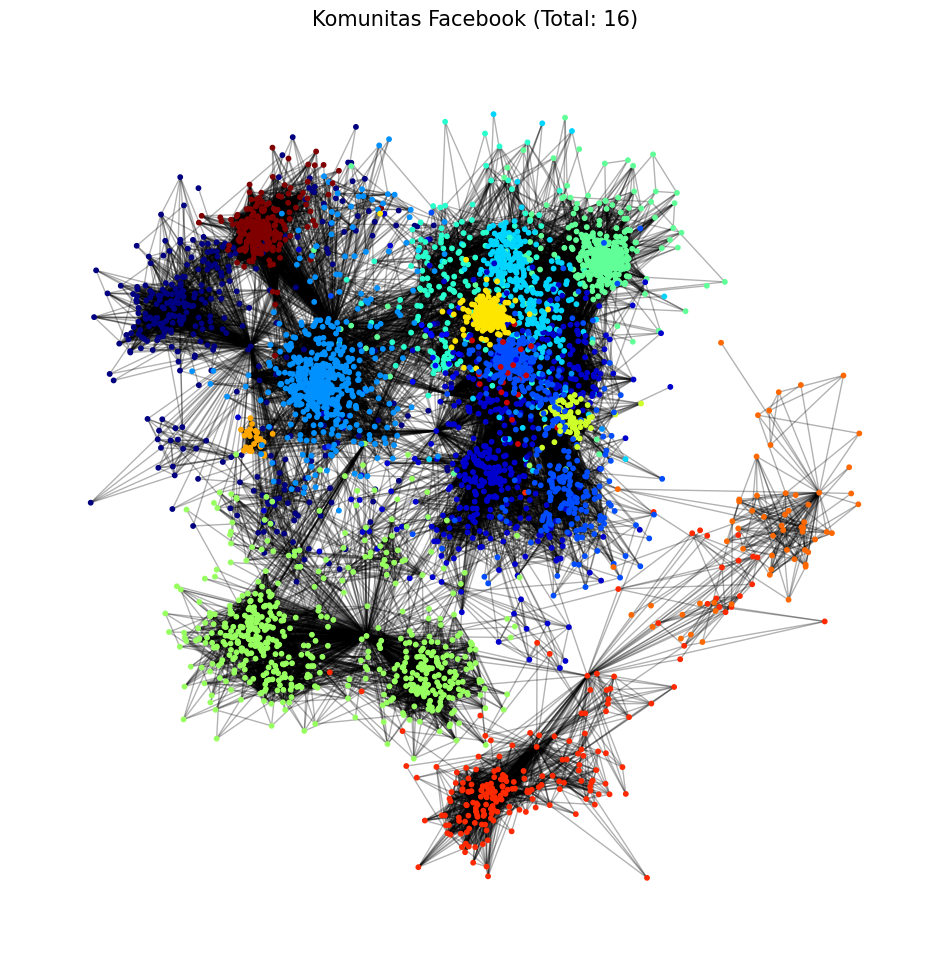

In [4]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt

# --- 1. Load Data ---
filename = 'facebook_combined.txt'
# Pastikan file ada di folder yang sama
G = nx.read_edgelist(filename, create_using=nx.Graph(), nodetype=int)

# --- 2. Hitung Komunitas (Louvain) ---
partition = community_louvain.best_partition(G)
mod = community_louvain.modularity(partition, G)

# Hitung jumlah total komunitas (ambil nilai unik dari partition)
total_komunitas = len(set(partition.values()))

# --- 3. Output Informasi ---
print("="*30)
print("HASIL ANALISIS")
print("="*30)
print(f"Modularity      : {mod:.3f}")
print(f"Total Komunitas : {total_komunitas}")
print(f"Total Node (user): {G.number_of_nodes()}")
print(f"Total Edge (hubungan): {G.number_of_edges()}")

print("\n" + "="*30)
print("ISI DATA (Preview 10 Baris Pertama)")
print("="*30)

# Membaca file mentah untuk menampilkan isinya (jangan print semua, nanti crash!)
try:
    with open(filename, 'r') as f:
        for i in range(10): # Cuma print 10 baris pertama
            line = f.readline()
            if not line: break
            print(f"Baris {i+1}: {line.strip()}")
    print("... (dan seterusnya sampai ribuan baris) ...")
except FileNotFoundError:
    print(f"Error: File '{filename}' tidak ditemukan!")

# --- 4. Visualisasi ---
# Note: Karena node-nya 4000, visualisasi akan sangat padat (hairball).
print("\nSedang membuat visualisasi, tunggu sebentar...")

plt.figure(figsize=(12, 12)) # Ukuran diperbesar biar lebih jelas
pos = nx.spring_layout(G, seed=42) # Seed biar gambarnya konsisten

# Menggambar graf
nx.draw_networkx_nodes(G, pos,
                       node_size=10,
                       cmap=plt.cm.jet,
                       node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3) # Transparansi edge biar tidak terlalu hitam

plt.title(f"Komunitas Facebook (Total: {total_komunitas})", fontsize=15)
plt.axis('off')
plt.show()